<a href="https://colab.research.google.com/github/DimpleB0501/eva8/blob/main/Session_12_Assignment_QnA/YOLOv3CustomData/YoloV3Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/theschoolofai/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 159, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 159 (delta 0), reused 1 (delta 0), pack-reused 156
Receiving objects: 100% (159/159), 12.75 MiB | 30.57 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!pip3 install torch==1.10.0 torchvision torchaudio torchtext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.9/881.9 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 76.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━

In [4]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.10.0+cu102 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


In [5]:
ls

gdrive/  sample_data/  YoloV3/


In [6]:
cd YoloV3/

/content/YoloV3


In [7]:
!ls

 annotation_tool   output	  results.txt	     train.py
 cfg		   __pycache__	  test_batch0.png   'ubdivisions=1'
 data		   README.md	  test.py	     utils
 detect.py	   results.json   ting		     vim.exe.stackdump
 models.py	   results.png	  train_batch0.png


# Loading weights

In [8]:
!mkdir weights
!cd weights
!gdown --id 17HnY3V_xOxiRwHw5AvKrSGhmZ35jr4ww

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=17HnY3V_xOxiRwHw5AvKrSGhmZ35jr4ww
To: /content/YoloV3/yolov3-spp-ultralytics.pt
100% 252M/252M [00:02<00:00, 90.4MB/s]


In [9]:
!mv yolov3-spp-ultralytics.pt weights/

# Custom data

In [10]:
!gdown --id 1ZnMguLH2HJ5qU6T9YqCMYkcCRFOYywdU

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ZnMguLH2HJ5qU6T9YqCMYkcCRFOYywdU
To: /content/YoloV3/customdata.zip
100% 278M/278M [00:08<00:00, 33.4MB/s]


In [11]:
!ls

 annotation_tool   models.py	  results.png	    train_batch0.png    weights
 cfg		   output	  results.txt	    train.py
 customdata.zip    __pycache__	  test_batch0.png  'ubdivisions=1'
 data		   README.md	  test.py	    utils
 detect.py	   results.json   ting		    vim.exe.stackdump


In [12]:
# Unzip raw zip file
!unzip -qq 'customdata.zip'

In [13]:
!rm -rf data
!mkdir data
!mv customdata data/

# Adding the modified cfg file (changes made classes=4, filters=27 ((4+1+4)*3))

In [14]:
!gdown --id 1zewPgm5_1rtb5Ycg8n1QGJZi-d9NNBVF

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1zewPgm5_1rtb5Ycg8n1QGJZi-d9NNBVF
To: /content/YoloV3/yolov3-custom.cfg
100% 8.59k/8.59k [00:00<00:00, 16.4MB/s]


In [15]:
!rm -rf cfg/yolov3-custom.cfg
!mv yolov3-custom.cfg cfg/

# Train

In [16]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 25 --nosave

Namespace(epochs=25, batch_size=10, accumulate=4, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', multi_scale=False, img_size=[512], rect=False, resume=False, nosave=True, notest=False, evolve=False, bucket='', cache_images=True, weights='weights/yolov3-spp-ultralytics.pt', name='', device='', adam=False, single_cls=False)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15101MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (2943 found, 131 missing, 38 empty, 0 duplicate, for 3112 images): 100% 3112/3112 [00:00<00:00, 4875.78it/s]
Caching images (1.7GB): 100% 3112/3112 [00:18<00:00, 164.36it/s]
Reading image shapes: 100% 20/20 [00:00<00:00, 2082.42it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 6830.00it/s]
Caching images (0.0GB): 100% 20/20 [00:00<00:00, 594.68it/s]
Image sizes 512 - 512 train, 512 test
Using 2 dataloader workers
Starting trainin

# Processing video

In [17]:
!gdown --id 1xJM6DCT_6U5_yrETlznumjmSB9QmgKks

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xJM6DCT_6U5_yrETlznumjmSB9QmgKks
To: /content/YoloV3/test_video_v2.mp4
100% 20.3M/20.3M [00:00<00:00, 76.0MB/s]


In [18]:
!python detect.py --conf-thres 0.1 --source "/content/YoloV3/test_video_v2.mp4" --output out_video

Namespace(cfg='cfg/yolov3-custom.cfg', names='data/customdata/custom.names', weights='weights/last.pt', source='/content/YoloV3/test_video_v2.mp4', output='out_video', img_size=512, conf_thres=0.1, iou_thres=0.6, fourcc='mp4v', half=False, device='', view_img=False, save_txt=False, classes=None, agnostic_nms=False, augment=False)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15101MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
/usr/local/lib/python3.9/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
video 1/1 (1/878) /content/YoloV3/test_video_v2.mp4: 320x512 2 hardhats, 1 vests, Done. (0.032s)
video 1/1 (2/878) /content/YoloV3/test_video_v2.mp4: 320x512 2 hardhats, 1 vests, Done. (0.032s)
video 1/

# Processing test images

In [19]:
!rm -rf out_images

In [22]:
!python detect.py --conf-thres 0.1 --source data/customdata/test_images --output out_images

Namespace(cfg='cfg/yolov3-custom.cfg', names='data/customdata/custom.names', weights='weights/last.pt', source='data/customdata/test_images', output='out_images', img_size=512, conf_thres=0.1, iou_thres=0.6, fourcc='mp4v', half=False, device='', view_img=False, save_txt=False, classes=None, agnostic_nms=False, augment=False)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15101MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
/usr/local/lib/python3.9/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
image 1/20 data/customdata/test_images/boots13.jpg: 384x512 1 bootss, Done. (0.036s)
image 2/20 data/customdata/test_images/boots18.jpg: 384x512 2 hardhats, 2 vests, 1 masks, 3 bootss, Done. (0.031s)
image 3

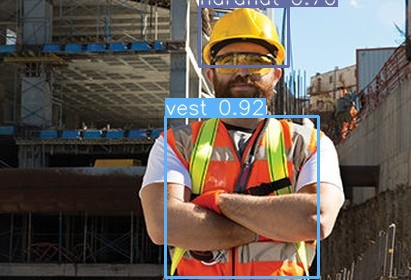

In [25]:
Image(filename='out_images/vest8.jpg', width=600)

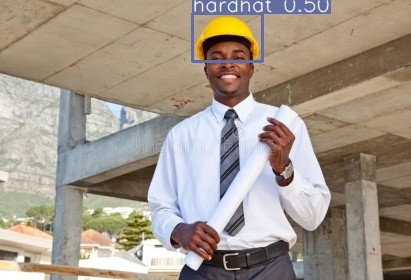

In [26]:
Image(filename='out_images/hardhat11.jpg', width=600)